NAME:kabina giri
AI LAB ASSIGNMENT
**Task 1**:Simple linear Regresssion(single Feature)
**Problem Statement**:
Build a simple linear regression model using only one input feature to predict housing prices.

.Input Feature: housing_median_age
.Label: median_house_value


#Target Variable (Label)
.median_house_value

#Input Features

.housing_median_age
.total_rooms
.total_bedrooms
.population
.households
.median_income
etc.

1️⃣ Data Retrieval and Collection

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
print("Shape of Dataset:", df.shape)
print("Column Names:", df.columns)


Shape of Dataset: (20640, 9)
Column Names: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


2️⃣ Data Cleaning

In [ ]:

print(df.isnull().sum())
print(df.dtypes)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


**Observation**:

There are no missing values in HouseAge

All data types are numeric (float or int)

**Missing Value Treatment**

Since there are no missing values in the selected feature (HouseAge), no treatment is required.
If missing values were present, we would handle them using:

In [ ]:
df['HouseAge'].fillna(df['HouseAge'].mean(), inplace=True)


3️⃣ Feature Design


In [ ]:
X = df[['HouseAge']]  
y = df['MedHouseVal']  


This features was choosen because of the following reasons:
1. House age impacts housing price.

2. Older houses may be cheaper.

3. Newer houses may be more expensive.

4. Simple and suitable for a single feature linear regression model

 4️⃣Algorithm Selection: Linear Regression

Linear Regression is selected for this task because our goal is to predict a **numerical value**, which is the median house value.

In this task, we are using only **one input feature (HouseAge)** to make predictions. This makes the problem a **simple linear regression** problem.

Linear regression tries to find a **straight-line relationship** between the input feature and the output value. It helps us understand how changes in house age affect housing prices.

This algorithm is easy to implement, easy to understand, and provides clear results such as:
- How much the house value changes when house age increases
- The starting value when house age is zero

Therefore, Linear Regression is a suitable and effective algorithm for predicting house prices based on housing median age.


 5️⃣ Loss Function Selection: Mean Squared Error (MSE)

Mean Squared Error (MSE) is used as the loss function for this linear regression model.

MSE measures the **average of the squared differences between the actual values and the predicted values**.

Mathematically, it is defined as:

MSE = (1/n) Σ (y_actual − y_predicted)²

Why MSE is used:
- Squaring the errors ensures all values are positive
- Larger errors are penalized more heavily
- It provides a clear measure of prediction accuracy

A **lower MSE value** indicates that the model’s predictions are closer to the actual house prices, meaning the model performs better.



6️⃣ Model Learning (Training)


In [ ]:

X = df[['HouseAge']]   
y = df['MedHouseVal'] 

In [10]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Learning Process**

The model learns the best-fitting line by minimizing the MSE and calculating:

1. Coefficient (slope)

2. Intercept

7️⃣ Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.2939617265100323
R² Score: 0.012551235533311389




- **Mean Squared Error (MSE)**: 1.2939  
  The MSE value indicates the average squared difference between the actual and predicted house values.  
  A higher MSE means the predictions are far from the actual values.

- **R² Score**: 0.0126 (≈ 1.26%)  
  The R² score shows how much of the variation in house prices is explained by the model.  
  Since the R² score is only 1.26%, the model is not able to explain the variation in house prices well using only HouseAge.

 **Conclusion**:
The model performs poorly because HouseAge alone is not enough to predict housing prices accurately.  
To improve performance, more features like median income, rooms, population, etc. are required.


Extra

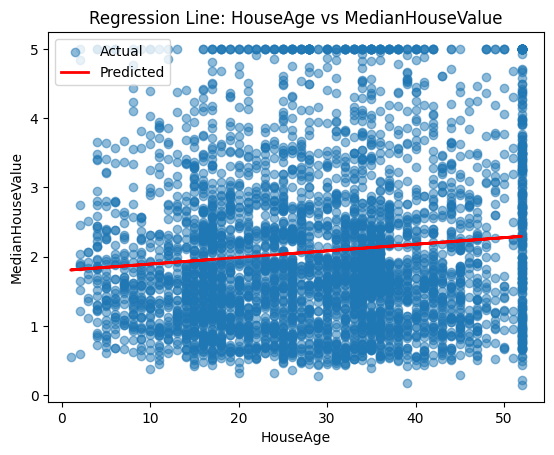

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label="Actual", alpha=0.5)

plt.plot(X_test, y_pred, color='red', label="Predicted", linewidth=2)

plt.xlabel("HouseAge")
plt.ylabel("MedianHouseValue")
plt.title("Regression Line: HouseAge vs MedianHouseValue")
plt.legend()
plt.show()


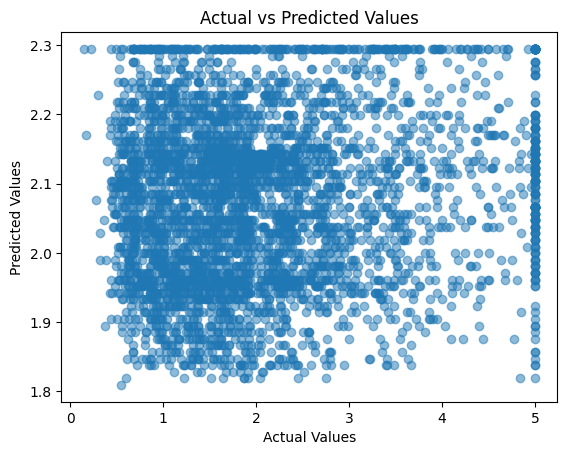

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


## Assumptions of Linear Regression

1. **Linearity**
   - There should be a linear relationship between the input feature and the target variable.
   - In this case, HouseAge should be linearly related to house price.

2. **Independence**
   - The observations must be independent of each other.
   - Each data point should not affect another.

3. **Homoscedasticity**
   - The error (residual) values should have constant variance.
   - Errors should not increase or decrease with the input feature.

4. **Normality of Residuals**
   - The residuals (difference between actual and predicted) should be normally distributed.

5. **No Multicollinearity**
   - In simple linear regression (one feature), this is automatically satisfied because only one feature is used.


# Task 2: Multiple Linear Regression (All Features)
# Problem Statement:
Build a multiple linear regression model using all available input features (except the label) to predict housing prices.

Input Features: All remaining features
Label: median_house_value

1️⃣ Data Retrieval and Collection

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

print("Shape of Dataset:", df.shape)
print("Column Names:", df.columns)


Shape of Dataset: (20640, 9)
Column Names: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


2️⃣ Data Cleaning

In [ ]:

print(df.isnull().sum())
print(df.dtypes)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


3️⃣ Feature Design (All Features)
✅ Select All Features Except Label

In [3]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


📌 Feature Scaling (Optional but Recommended)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Feature Design

All features except the target variable (MedHouseVal) are used as input features.  
Using multiple features can improve prediction performance because housing price depends on many factors like:
- Median income
- Number of rooms
- Population
- Location (latitude/longitude)
- Occupancy

Feature scaling is applied to standardize the data so that all features have equal importance and range.


4️⃣  Algorithm Selection

Multiple Linear Regression is selected because the target variable is continuous and we have multiple input features.  

This algorithm models the relationship between multiple input features and the target variable using a linear equation.


5️⃣ Loss Function Selection

## Loss Function Selection

Mean Squared Error (MSE) is used as the loss function.  
MSE measures the average squared difference between actual and predicted values.  
Lower MSE means better performance.


6️⃣ Model Learning (Training)

In [7]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


7️⃣ Model Evaluation

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_multi = model_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Mean Squared Error:", mse_multi)
print("R² Score:", r2_multi)


Mean Squared Error: 0.5558915986952444
R² Score: 0.5757877060324508


✅ Interpretation

The model performance improves when multiple features are used because housing prices depend on many factors, not just HouseAge.  
A higher R² score means the model explains more variation in house prices.


📈 Model Interpretation

In [11]:
print("Intercept:", model_multi.intercept_)
print("Coefficients:", model_multi.coef_)


Intercept: 2.067862309508389
Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]


## Model Interpretation

- **Intercept**
  The predicted house price when all features are 0.

- **Coefficients**  
  Each coefficient represents the effect of one feature on the target variable while keeping other features constant.  
  For example, a positive coefficient for Median Income means higher income leads to higher house price.

### Difference from Task 1
Task 1 uses only HouseAge.  
Task 2 uses all features, so it provides more accurate predictions but is slightly harder to interpret.


📊 Model Comparison (Task 1 vs Task 2)

## Model Comparison

- **Which model performs better?**  
  Task 2 performs better because it uses multiple features.

- **Why multiple features help?**  
  Housing price depends on many factors like income, rooms, population, location, etc.

- **Which model is easier to interpret?**  
  Task 1 is easier to interpret because it has only one feature.  
  Task 2 is harder to interpret due to many coefficients.
